In [32]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import gmaps
import requests
import json 

In [33]:
csvfile = "Project_data_Children_under_5.csv"

In [34]:
dataframe = pd.read_csv(csvfile)

dataframe.head(100)

,state,Survey,Area,Population And Household Profile - Sex Ratio At Birth For Children Born In The Last Five Years (Females Per 1000 Males),Population And Household Profile - Children Under Age 5 Years Whose Birth Was Registered (%),Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Stunted (Height-For-Age) (%),Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Wasted (Weight-For-Height) (%),Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Severely Wasted (Weight-For-Height) (%),Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Underweight (Weight-For-Age) (%),Child Feeding Practices And Nutritional Status Of Children - Children Under Age 3 Years Breastfed Within One Hour Of Birth (%),Child Feeding Practices And Nutritional Status Of Children - Children Under Age 6 Months Exclusively Breastfed (%),Child Feeding Practices And Nutritional Status Of Children - Breastfeeding Children Age 6-23 Months Receiving An Adequate Diet (%,Child Feeding Practices And Nutritional Status Of Children - Non-Breastfeeding Children Age 6-23 Months Receiving An Adequate Diet (%,Child Feeding Practices And Nutritional Status Of Children - Children Age 6-8 Months Receiving Solid Or Semi-Solid Food And Breastmilk (%),Child Feeding Practices And Nutritional Status Of Children - Total Children Age 6-23 Months Receiving An Adequate Diet (%
0,India,NFHS-4,Total,919.0,79.7,38.4,21.0,7.5,35.7,41.6,54.9,8.7,14.3,42.7,9.6
1,India,NFHS-4,Rural,927.0,76.1,41.2,21.5,7.4,38.3,41.1,56.0,8.2,12.7,39.9,8.8
2,India,NFHS-4,Urban,899.0,88.8,31.0,20.0,7.5,29.1,42.8,52.1,10.1,16.9,50.1,11.6
3,India,NFHS-3,Total,914.0,41.2,48.0,19.8,6.4,42.5,23.4,46.4,NaN,NaN,52.6,NaN
4,Andhra Pradesh,NFHS-4,Total,914.0,82.7,31.4,17.2,4.5,31.9,40.1,70.2,6.5,11.9,56.1,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Jammu & Kashmir,NFHS-3,Total,902.0,35.8,35.0,14.8,4.4,25.6,31.9,42.3,NaN,NaN,52.7,NaN
96,Manipur,NFHS-4,Total,962.0,64.8,28.9,6.8,2.2,13.8,65.4,73.6,19.3,14.1,78.8,18.8
97,Manipur,NFHS-4,Rural,962.0,59.7,31.4,7.1,2.4,14.2,66.1,71.3,18.4,7.5,78.8,17.3
98,Manipur,NFHS-4,Urban,962.0,74.8,24.1,6.4,1.8,13.1,64.2,78.9,21.2,34.1,78.6,22.1


In [35]:
dataframe.columns


Index(['state', 'Survey', 'Area',
       'Population And Household Profile - Sex Ratio At Birth For Children Born In The Last Five Years (Females Per 1000 Males)',
       'Population And Household Profile - Children Under Age 5 Years Whose Birth Was Registered (%)',
       'Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Stunted (Height-For-Age) (%)',
       'Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Wasted (Weight-For-Height) (%)',
       'Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Severely Wasted (Weight-For-Height) (%)',
       'Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Underweight (Weight-For-Age) (%)',
       'Child Feeding Practices And Nutritional Status Of Children - Children Under Age 3 Years Breastfed Within One Hour Of Birth (%)',
       'Child Feeding Practices And Nutritional Status 

In [36]:
dataframe2 = dataframe.rename(columns={"Population And Household Profile - Sex Ratio At Birth For Children Born In The Last Five Years (Females Per 1000 Males)":"Gender_Aged_5years(Females per 1000 Males)",
                          "Population And Household Profile - Children Under Age 5 Years Whose Birth Was Registered (%)":"Children_Registered",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Stunted (Height-For-Age) (%)":"Children_Stunted_5years(Height-For-Age)",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Wasted (Weight-For-Height) (%)":"Children_Wasted(Weight-For-Height)",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Severely Wasted (Weight-For-Height) (%)":"Children_Severely_Wasted(Weight-For-Height)",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Underweight (Weight-For-Age) (%)":"Children_Underweight_5years(Weight-For-Age)",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under Age 3 Years Breastfed Within One Hour Of Birth (%)":"Children_Breastfed_Within_One_Hour_Of_Birth_3years",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under Age 6 Months Exclusively Breastfed (%)":"Children_Under_Age_6_Months_Exclusively_Breastfed",
                          "Child Feeding Practices And Nutritional Status Of Children - Breastfeeding Children Age 6-23 Months Receiving An Adequate Diet (%":"Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet",
                          "Child Feeding Practices And Nutritional Status Of Children - Non-Breastfeeding Children Age 6-23 Months Receiving An Adequate Diet (%":"Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Age 6-8 Months Receiving Solid Or Semi-Solid Food And Breastmilk (%":"Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate_Diet",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Age 6-8 Months Receiving Solid Or Semi-Solid Food And Breastmilk (%)":"Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk",
                          "Child Feeding Practices And Nutritional Status Of Children - Total Children Age 6-23 Months Receiving An Adequate Diet (%":"Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet"})
dataframe2.head()

,state,Survey,Area,Gender_Aged_5years(Females per 1000 Males),Children_Registered,Children_Stunted_5years(Height-For-Age),Children_Wasted(Weight-For-Height),Children_Severely_Wasted(Weight-For-Height),Children_Underweight_5years(Weight-For-Age),Children_Breastfed_Within_One_Hour_Of_Birth_3years,Children_Under_Age_6_Months_Exclusively_Breastfed,Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk,Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet
0,India,NFHS-4,Total,919.0,79.7,38.4,21.0,7.5,35.7,41.6,54.9,8.7,14.3,42.7,9.6
1,India,NFHS-4,Rural,927.0,76.1,41.2,21.5,7.4,38.3,41.1,56.0,8.2,12.7,39.9,8.8
2,India,NFHS-4,Urban,899.0,88.8,31.0,20.0,7.5,29.1,42.8,52.1,10.1,16.9,50.1,11.6
3,India,NFHS-3,Total,914.0,41.2,48.0,19.8,6.4,42.5,23.4,46.4,NaN,NaN,52.6,NaN
4,Andhra Pradesh,NFHS-4,Total,914.0,82.7,31.4,17.2,4.5,31.9,40.1,70.2,6.5,11.9,56.1,7.6


In [37]:
dataframe2.head()
#cite
#https://www.geeksforgeeks.org/python-pandas-dataframe-rename/

,state,Survey,Area,Gender_Aged_5years(Females per 1000 Males),Children_Registered,Children_Stunted_5years(Height-For-Age),Children_Wasted(Weight-For-Height),Children_Severely_Wasted(Weight-For-Height),Children_Underweight_5years(Weight-For-Age),Children_Breastfed_Within_One_Hour_Of_Birth_3years,Children_Under_Age_6_Months_Exclusively_Breastfed,Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk,Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet
0,India,NFHS-4,Total,919.0,79.7,38.4,21.0,7.5,35.7,41.6,54.9,8.7,14.3,42.7,9.6
1,India,NFHS-4,Rural,927.0,76.1,41.2,21.5,7.4,38.3,41.1,56.0,8.2,12.7,39.9,8.8
2,India,NFHS-4,Urban,899.0,88.8,31.0,20.0,7.5,29.1,42.8,52.1,10.1,16.9,50.1,11.6
3,India,NFHS-3,Total,914.0,41.2,48.0,19.8,6.4,42.5,23.4,46.4,NaN,NaN,52.6,NaN
4,Andhra Pradesh,NFHS-4,Total,914.0,82.7,31.4,17.2,4.5,31.9,40.1,70.2,6.5,11.9,56.1,7.6


In [41]:
df_nona = dataframe2.fillna(0)

In [42]:
Survey_NFHS3 = df_nona.loc[df_nona["Survey"] == "NFHS-3"]

In [43]:
Survey_NFHS4 = df_nona.loc[df_nona["Survey"] == "NFHS-4"]


In [53]:
Survey_NFHS4_rural = Survey_NFHS4.loc[Survey_NFHS4["Area"] == "Rural"]
Survey_NFHS4_urban = Survey_NFHS4.loc[Survey_NFHS4["Area"] == "Urban"]
Survey_NFHS4_total = Survey_NFHS4.loc[Survey_NFHS4["Area"] == "Total"]

In [45]:
len(Survey_NFHS4_rural)

37

In [46]:
#NFHS3 Female Child per 1000 males per state
NFHS3_Female_Child = Survey_NFHS3[["state","Gender_Aged_5years(Females per 1000 Males)","Children_Underweight_5years(Weight-For-Age)"]].reset_index()

#NFHS3_Female_Child = NFHS3_Female_Child.drop(columns=["index"])
NFHS3_Female_Child

,index,state,Gender_Aged_5years(Females per 1000 Males),Children_Underweight_5years(Weight-For-Age)
0,3,India,914.0,42.5
1,7,Andhra Pradesh,0.0,0.0
2,11,Assam,1033.0,36.4
3,15,Bihar,893.0,55.9
4,19,Chattisgarh,972.0,47.1
5,23,Gujarat,906.0,44.6
6,27,Haryana,762.0,39.6
7,31,Jharkhand,1091.0,56.5
8,35,Karnataka,922.0,37.6
9,39,Kerala,925.0,22.9


In [47]:
#NFHS4 Female Child per 1000 males per state
NFHS4_Female_Child = Survey_NFHS4_total[["state","Gender_Aged_5years(Females per 1000 Males)","Children_Underweight_5years(Weight-For-Age)"]].reset_index()

#NFHS4_Female_Child = NFHS4_Female_Child.drop(columns=["index"])
NFHS4_Female_Child

,index,state,Gender_Aged_5years(Females per 1000 Males),Children_Underweight_5years(Weight-For-Age)
0,0,India,919.0,35.7
1,4,Andhra Pradesh,914.0,31.9
2,8,Assam,929.0,29.8
3,12,Bihar,934.0,43.9
4,16,Chattisgarh,977.0,37.7
5,20,Gujarat,907.0,39.3
6,24,Haryana,836.0,29.4
7,28,Jharkhand,919.0,47.8
8,32,Karnataka,910.0,35.2
9,36,Kerala,1047.0,16.1


In [48]:
#Both DataFrames merged into one
#Derived the percent change of Female CHild per 1000 male over the period of both surveys.

#Note: since some states had 0 durin NFHS3 survey, those percentage changes show in negative. 

Female_Gender_NFHS3_NFHS4 = pd.merge(NFHS3_Female_Child,NFHS4_Female_Child, on="state")
Female_Gender_NFHS3_NFHS4 = Female_Gender_NFHS3_NFHS4.rename(columns={"Gender_Aged_5years(Females per 1000 Males)_y":"Gender_Aged_5years(Females per 1000 Males)NFHS4","Gender_Aged_5years(Females per 1000 Males)_x":"Gender_Aged_5years(Females per 1000 Males)NFHS3"})

Female_Gender_NFHS3_NFHS4 = Female_Gender_NFHS3_NFHS4.rename(columns={"Children_Underweight_5years(Weight-For-Age)_x":"NFHS3 underweight","Children_Underweight_5years(Weight-For-Age)_y":"NFHS4 underweight"})



Female_Gender_NFHS3_NFHS4["Percent of gender diff"] =""
Female_Gender_NFHS3_NFHS4["underweight diff"] =""

underweight_change = (Female_Gender_NFHS3_NFHS4["NFHS4 underweight"])- (Female_Gender_NFHS3_NFHS4["NFHS3 underweight"])

gender_change = (Female_Gender_NFHS3_NFHS4["Gender_Aged_5years(Females per 1000 Males)NFHS4"])- (Female_Gender_NFHS3_NFHS4["Gender_Aged_5years(Females per 1000 Males)NFHS3"])

gender_change_increase = ((gender_change)/(Female_Gender_NFHS3_NFHS4["Gender_Aged_5years(Females per 1000 Males)NFHS3"]))*100

gender_change_increase

Female_Gender_NFHS3_NFHS4["Percent of gender diff"] = gender_change_increase
Female_Gender_NFHS3_NFHS4["underweight diff"] = underweight_change

Female_Gender_NFHS3_NFHS4 = Female_Gender_NFHS3_NFHS4.replace(np.inf, np.nan)

Female_Gender_NFHS3_NFHS4 = Female_Gender_NFHS3_NFHS4.fillna(0)

Female_Gender_NFHS3_NFHS4["Percent of gender diff"] = Female_Gender_NFHS3_NFHS4["Percent of gender diff"].map("{:,.2f}%".format)





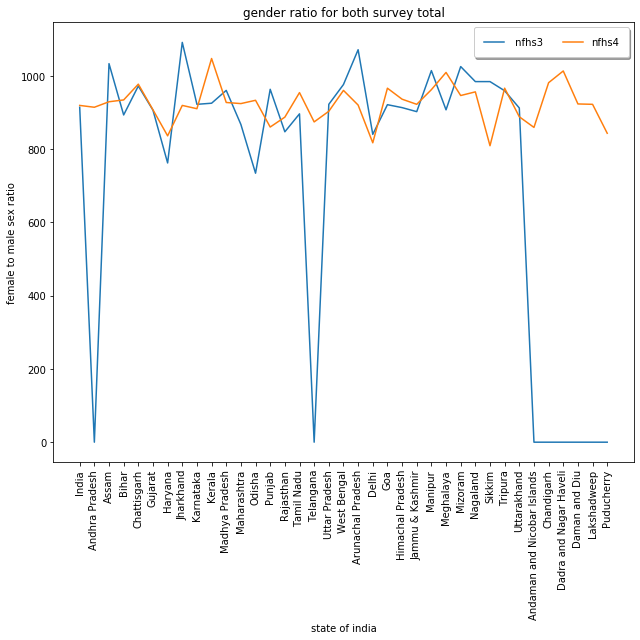

In [15]:
#plot a bar graph of gender ratio of total nfhs3 and 4




# Set x axis and tick locations
x_axis = np.arange(len(Survey_NFHS3['state']))
tick_locations = [value for value in x_axis]


gender_chart = Female_Gender_NFHS3_NFHS4.plot(x='state',y=['Gender_Aged_5years(Females per 1000 Males)NFHS3','Gender_Aged_5years(Females per 1000 Males)NFHS4'],kind="line", title="gender ratio for both survey total",figsize=(9,9))
gender_chart.set_xlabel("state of india")
gender_chart.set_ylabel("female to male sex ratio")

plt.xticks(tick_locations, Survey_NFHS3['state'], rotation="vertical")
#fig.set_size_inches(1000, 290, forward=True)
#plt.savefig("/Images/genderratioplotofsurveystotal.png")
Gender = [ ' nfhs3','nfhs4']
plt.legend(Gender, loc="upper right",fancybox=True, framealpha=1, shadow=True, borderpad=1, ncol=2)
plt.tight_layout()

plt.show()

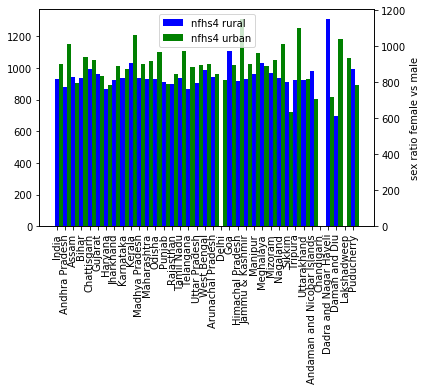

<Figure size 21600x21600 with 0 Axes>

In [49]:
#plot gender of  nfhs 4 rural vs urban for each state

x = np.arange(len(Survey_NFHS4_rural['state']))
tick_locations = [value for value in x]
                  
        
ax1 = plt.subplot(1,1,1)
w = 0.5
#plt.xticks(), will label the bars on x axis with the respective state names.
plt.xticks(tick_locations, Survey_NFHS4_rural['state'], rotation="vertical")
pop =ax1.bar(x,Survey_NFHS4_rural['Gender_Aged_5years(Females per 1000 Males)'], width=w, color='b', align='center')
#The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
ax2 = ax1.twinx()

gdp =ax2.bar(x + w, Survey_NFHS4_urban['Gender_Aged_5years(Females per 1000 Males)'], width=w,color='g',align='center')
#Set the Y axis label 


plt.ylabel('sex ratio female vs male')
plt.xlabel('States of india')
#To set the legend on the plot we have used plt.legend()
plt.legend([pop, gdp],[ 'nfhs4 rural','nfhs4 urban'])
plt.figure(figsize=(300,300))
plt.show()




In [17]:
#Ratio of underfed to wellfed for hfhs 3 totals for each state





# Set x axis and tick locations
#x_axis = np.arange(len(Survey_NFHS3['state']))
#tick_locations = [value for value in x_axis]


#nfhs3plot= Survey_NFHS3.plot(x='state',y=['underfed','adequatefed'],kind="line", color = ['grey','orange'],title="underfed vs adequatefed for NFHS3 total")
#nfhs3plot.set_xlabel("state of india")
#nfhs3plot.set_ylabel("underfed and adequatefed")
#plt.xticks(tick_locations, Survey_NFHS3['state'], rotation="vertical")
#Gender = [ ' nfhs3 underfed','nfhs3 adequatefed']
#plt.legend(Gender, loc="upper right",fancybox=True, framealpha=1, shadow=True, borderpad=1, ncol=2)
#plt.tight_layout()
#plt.show()



In [18]:
#Ratio of underfed to wellfed for hfhs 4 rurals for each state
# Set x axis and tick locations




In [19]:
#Ratio of underfed to wellfed for hfhs 4 urban for each state
# Set x axis and tick locations
#x_axis = np.arange(len(Survey_NFHS4_urban['state']))
#tick_locations = [value for value in x_axis]


#nfhs4urbanplot= Survey_NFHS4_urban.plot(x='state',y=['underfed','adequatefed'],kind="line", color =['pink','blue'],title="underfed vs adequatefed for NFHS4 urban")
#nfhs4urbanplot.set_xlabel("state of india")
#nfhs4urbanplot.set_ylabel("underfed and adequatefed")

#plt.xticks(tick_locations, Survey_NFHS4_urban['state'], rotation="vertical")
#plt.figure(figsize=(700,700))
#fig.set_size_inches(1000, 290, forward=True)
#plt.savefig("/Images/fig3.png")
#Gender = [ ' nfhs4 urban underfed','adequatefed']
#plt.legend(Gender, loc="best",fancybox=False,ncol=2)
#plt.tight_layout()

#plt.show()



In [20]:
#plot nfhs 4  vs nfhs 3 total underfed for each state

#x = np.arange(len(Survey_NFHS4_total['state']))
#tick_locations = [value for value in x]
                  
        
#ax1 = plt.subplot(1,1,1)
#w = 0.5
#plt.xticks(), will label the bars on x axis with the respective state names.
#plt.xticks(tick_locations, Survey_NFHS4_total['state'], rotation="vertical")
#pop =ax1.bar(x,Survey_NFHS4_total['underfed'], width=w, color='pink', align='center')
#The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
#ax2 = ax1.twinx()

#gdp =ax2.bar(x + w, Survey_NFHS3['underfed'], width=w,color='black',align='center')

#Set the axis label 
#plt.ylabel('underfed in both surveys')
#plt.xlabel('States of india')
#To set the legend on the plot we have used plt.legend()
#plt.legend([pop, gdp],[ 'nfhs4','nfhs3'])
#plt.title('plot nfhs 4  vs nfhs 3 total underfed for each state')
#plt.show()

In [21]:

#total of both survey adequatefed graph



#x_axis = np.arange(len(Survey_NFHS4_total['state']))
#tick_locations = [value for value in x_axis]
#boxplot = Survey_NFHS4_total.boxplot(column=[Survey_NFHS4_total['underfed'], Survey_NFHS3['underfed']], by='state',layout=(2, 1))

# Plot the nfhs4 adequatefed as a line chart
#world_avg, = plt.plot(Survey_NFHS4_total['state'], Survey_NFHS4_total['adequatefed'], color="blue", label="nfhs4" )

# Plot thenfhs3 adeqautefed  for a single country
#country_one, = plt.plot(Survey_NFHS4_total['state'], Survey_NFHS3['adequatefed'],color="green",label= "nfhs3")


#plt.xticks(tick_locations, Survey_NFHS4_total['state'], rotation="vertical")
# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")
#plt.xlabel('states of india')
#plt.ylabel('underfed in both surveys')
#plt.title('both survey adequatefed graph comparing total data')
# Show the chart
#plt.show()

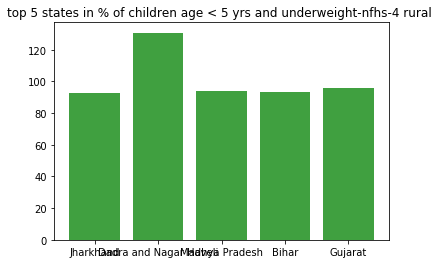

In [22]:
#top 5 states in % of children age < 5 yrs and underweight-nfhs-4

top51 = Survey_NFHS4_rural.nlargest(5, ['Children_Underweight_5years(Weight-For-Age)'], keep='first')
top52 = Survey_NFHS4_urban.nlargest(5, ['Children_Underweight_5years(Weight-For-Age)'], keep='first')
top53 = Survey_NFHS4_total.nlargest(5, ['Children_Underweight_5years(Weight-For-Age)'], keep='first')
top54 = Survey_NFHS3.nlargest(5, ['Children_Underweight_5years(Weight-For-Age)'], keep='first')


#NFHS4urban_top5_Data = pd.DataFrame({"state":top5['state'],
                                      #"Under Fed Children":top5['underfed']})


ax1 = np.arange(len(top51['state']))
tick_locations = []
for x in ax1:
    tick_locations.append(x)

    
    
plt.bar(ax1,(top51['Gender_Aged_5years(Females per 1000 Males)']/10) ,facecolor="green", alpha=0.75, align="center")

plt.xticks(tick_locations, top51['state'])
plt.title('top 5 states in % of children age < 5 yrs and underweight-nfhs-4 rural ')
plt.show()


#children pecentage is (top51['Gender_Aged_5years(Females per 1000 Males)']/10)



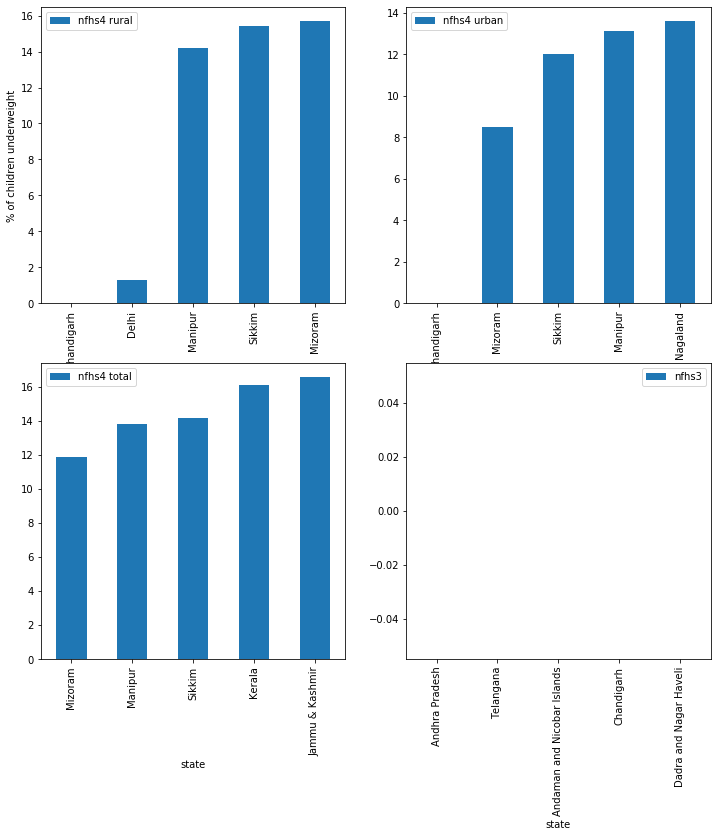

In [23]:
#bottom 5 for all survey underweight analysis

bottom51 = Survey_NFHS4_rural.nsmallest(5, ['Children_Underweight_5years(Weight-For-Age)'], keep='first')
bottom52 = Survey_NFHS4_urban.nsmallest(5, ['Children_Underweight_5years(Weight-For-Age)'], keep='first')
bottom53 = Survey_NFHS4_total.nsmallest(5, ['Children_Underweight_5years(Weight-For-Age)'], keep='first')
bottom54 = Survey_NFHS3.nsmallest(5, ['Children_Underweight_5years(Weight-For-Age)'], keep='first')




# dataframe sample data

df5= bottom51[["state","Children_Underweight_5years(Weight-For-Age)"]]
df6= bottom52[["state","Children_Underweight_5years(Weight-For-Age)"]]
df7 =bottom53[["state","Children_Underweight_5years(Weight-For-Age)"]]
df8 = bottom54[["state","Children_Underweight_5years(Weight-For-Age)"]]


fig, axes = plt.subplots(nrows=2, ncols=2)

w2=df5.plot(x='state',y='Children_Underweight_5years(Weight-For-Age)',ax=axes[0,0],kind='bar',label= "nfhs4 rural",figsize=(12,12))
w2.set_ylabel('% of children underweight')
w4=df6.plot(kind='bar',x='state',y='Children_Underweight_5years(Weight-For-Age)' , ax=axes[0,1],label= "nfhs4 urban")
w4.set_xlabel('states')
df7.plot(kind='bar',x='state',y='Children_Underweight_5years(Weight-For-Age)' , ax=axes[1,0],label= "nfhs4 total")
df8.plot(kind='bar',x='state',y='Children_Underweight_5years(Weight-For-Age)' , ax=axes[1,1],label= "nfhs3")



plt.savefig('Images/bottom4underweight.png')


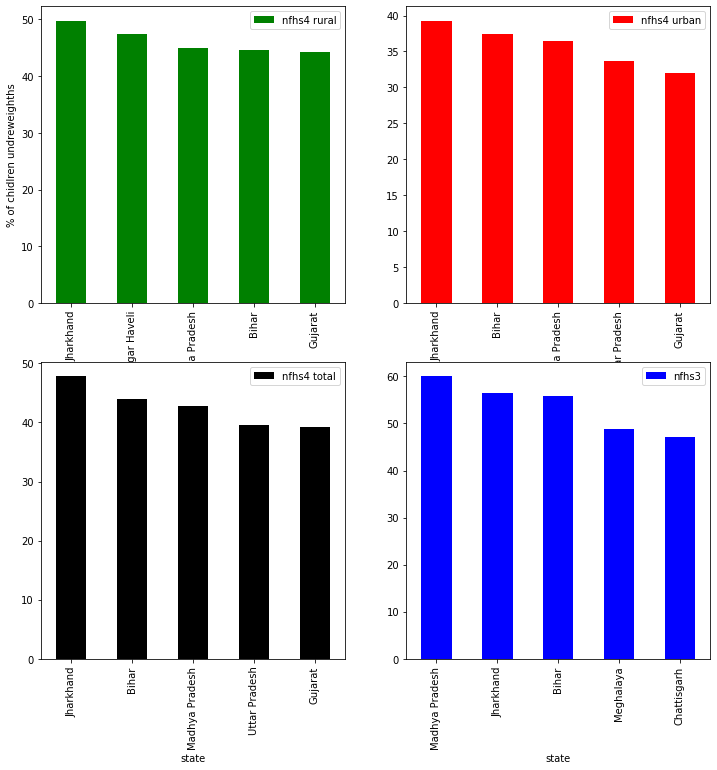

In [24]:
# dataframe sample data

df1= top51[["state","Children_Underweight_5years(Weight-For-Age)"]]
df2= top52[["state","Children_Underweight_5years(Weight-For-Age)"]]
df3 =top53[["state","Children_Underweight_5years(Weight-For-Age)"]]
df4=top54[["state","Children_Underweight_5years(Weight-For-Age)"]]


fig, axes = plt.subplots(nrows=2, ncols=2)

ax1=df1.plot(x='state',y='Children_Underweight_5years(Weight-For-Age)',ax=axes[0,0],kind='bar',color="green",label= "nfhs4 rural",figsize=(12,12))
ax1.set_ylabel('% of chidlren undreweighths')
df2.plot(kind='bar',x='state',y='Children_Underweight_5years(Weight-For-Age)' , ax=axes[0,1],color="red",label= "nfhs4 urban")
df3.plot(kind='bar',x='state',y='Children_Underweight_5years(Weight-For-Age)' , ax=axes[1,0],color="black",label= "nfhs4 total")
df4.plot(kind='bar',x='state',y='Children_Underweight_5years(Weight-For-Age)' , ax=axes[1,1],color="blue",label= "nfhs3")

plt.xlabel('state')
plt.savefig('Images/underweighttop5.png')



The the median ofnfhs3  is: 32.5 
Values below -10.100000000000001 could be outliers.
Values above 69.9 could be outliers.
nfhs3 outliners are none
The the median of nfhs4 rural   is: 29.9 
Values below -5.199999999999999 could be outliers.
Values above 64.39999999999999 could be outliers.
nfhs4 rural outliners are none


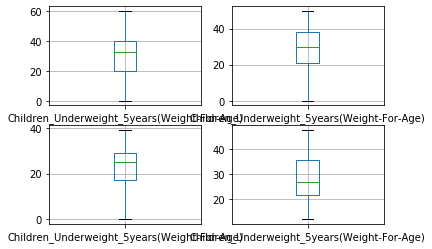

In [25]:
#box-plot showing outliers forn underweight for all surveys


fig, axes = plt.subplots(nrows=2, ncols=2)

Survey_NFHS3.boxplot('Children_Underweight_5years(Weight-For-Age)', ax=axes[0,0])
Survey_NFHS4_rural.boxplot('Children_Underweight_5years(Weight-For-Age)', ax=axes[0,1])
Survey_NFHS4_urban.boxplot('Children_Underweight_5years(Weight-For-Age)', ax=axes[1,0])
Survey_NFHS4_total.boxplot('Children_Underweight_5years(Weight-For-Age)', ax=axes[1,1])


#print nfhs3 outliers

quartilesnfhs3 = Survey_NFHS3['Children_Underweight_5years(Weight-For-Age)'].quantile([.25,.5,.75])
lowerq1 = quartilesnfhs3[0.25]
upperq1 = quartilesnfhs3[0.75]
iqr1 = upperq1-lowerq1
print(f"The the median ofnfhs3  is: {quartilesnfhs3[0.5]} ")
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"Values below {lower_bound1} could be outliers.")
print(f"Values above {upper_bound1} could be outliers.")
outlier_nfhs3 = Survey_NFHS3.loc[(Survey_NFHS3['Children_Underweight_5years(Weight-For-Age)'] < lower_bound1) | (Survey_NFHS3['Children_Underweight_5years(Weight-For-Age)'] > upper_bound1)]
print("nfhs3 outliners are none")

#prit nfhs4 rural outliers

quartilesnfhs4rural = Survey_NFHS4_rural['Children_Underweight_5years(Weight-For-Age)'].quantile([.25,.5,.75])
lowerq2 = quartilesnfhs4rural[0.25]
upperq2 = quartilesnfhs4rural[0.75]
iqr2 = upperq2-lowerq2
print(f"The the median of nfhs4 rural   is: {quartilesnfhs4rural[0.5]} ")
lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Values below {lower_bound2} could be outliers.")
print(f"Values above {upper_bound2} could be outliers.")

outlier_nfhs4rural = Survey_NFHS4_rural.loc[(Survey_NFHS4_rural['Children_Underweight_5years(Weight-For-Age)'] < lower_bound2) | (Survey_NFHS4_rural['Children_Underweight_5years(Weight-For-Age)'] > upper_bound2)]
print("nfhs4 rural outliners are none" )

#print nfhs4 urban outliers





In [26]:
#googlemaps


gkey = ""
#params = {"address": target_city, "key": gkey}

# Build URL using the Google Maps API
base_url = "https://maps.googleapis.com/maps/api/geocode/json"


list_lat = []   # create empty lists
list_long = []


params = {"key": gkey}

for index, row in Female_Gender_NFHS3_NFHS4.iterrows(): # iterate over rows in dataframe



    City = row['state']
     # update address key value
    params['address'] = f"{City}"
          
    
    response = requests.get(base_url, params=params)

    geo_data = response.json()
   #result = response.json()
    lat = geo_data["results"][0]["geometry"]["location"]["lat"]
    long = geo_data["results"][0]["geometry"]["location"]["lng"]

    list_lat.append(lat)
    list_long.append(long)


# create new columns from lists    

Female_Gender_NFHS3_NFHS4['lat'] = list_lat   

Female_Gender_NFHS3_NFHS4['lng'] = list_long





IndexError: list index out of range

In [ ]:
# create a map showing highest underweight 

Top10_Selected_State = Female_Gender_NFHS3_NFHS4.nlargest(5, ['underweight diff'], keep='first')


change_value = Top10_Selected_State['underweight diff'].tolist()
marker_locations = Top10_Selected_State[['lat', 'lng']]




# Convert Poverty Rate to float and store
# HINT: be sure to handle NaN values

info_box_template = """
<dl>
<dt>weight diff</dt><dd>{underweight diff}</dd>
<dt>City</dt><dd>{state}</dd>
<dt>gender diff</dt><dd>{Percent of gender diff}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in Top10_Selected_State.iterrows()]
#locations = Female_Gender_NFHS3_NFHS4[["lat", "lng"]]

markers = gmaps.marker_layer(marker_locations, info_box_content=hotel_info)

fig.add_layer(markers)

fig

The correlation coefficient between nfhs4 underweight&adequate diet is -0.28
The correlation coefficient between nfhs4 rural underweight&adequate diet is 0.01
The correlation coefficient between nfhs4 urban underweight&adequate diet is 0.12
The correlation coefficient between nfhs3 underweight&adequate diet is 0.57


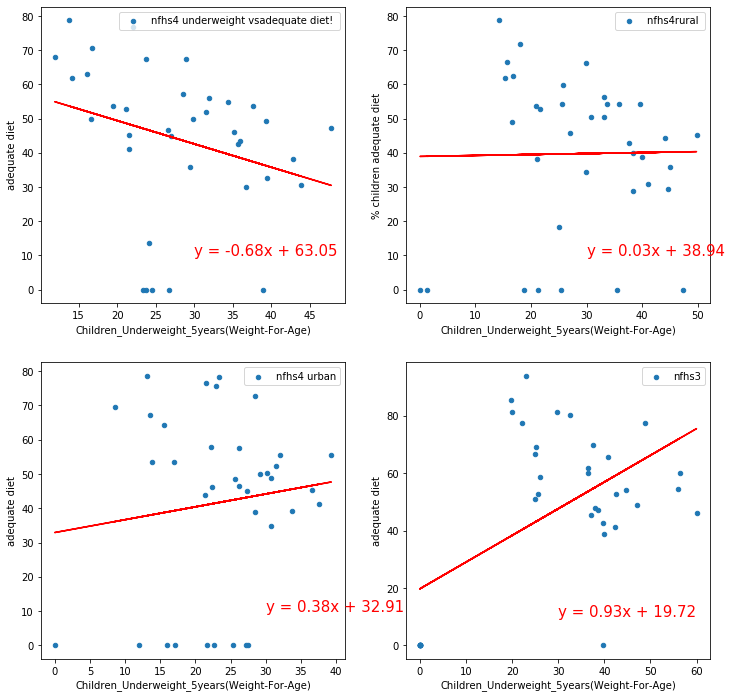

In [27]:
y1=Survey_NFHS4_total['Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk']
x1=Survey_NFHS4_total['Children_Underweight_5years(Weight-For-Age)']
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x1, y1)
regress_values1 = x1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))


y2=Survey_NFHS4_rural['Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk']
x2=Survey_NFHS4_rural['Children_Underweight_5years(Weight-For-Age)']
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x2, y2)
regress_values2 = x2 * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

y3=Survey_NFHS4_urban['Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk']
x3=Survey_NFHS4_urban['Children_Underweight_5years(Weight-For-Age)']
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress(x3, y3)
regress_values3 = x3 * slope3 + intercept3
line_eq3 = "y = " + str(round(slope3,2)) + "x + " + str(round(intercept3,2))


y4=Survey_NFHS3['Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk']
x4=Survey_NFHS3['Children_Underweight_5years(Weight-For-Age)']
(slope4, intercept4, rvalue4, pvalue4, stderr4) = linregress(x4, y4)
regress_values4 = x4 * slope4 + intercept4
line_eq4 = "y = " + str(round(slope4,2)) + "x + " + str(round(intercept4,2))



fig, axes = plt.subplots(nrows=2, ncols=2)

w2=Survey_NFHS4_total.plot(y='Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk',x='Children_Underweight_5years(Weight-For-Age)',ax=axes[0,0],kind='scatter',label= "nfhs4 underweight vsadequate diet! ",figsize=(12,12))
w2.set_ylabel('adequate diet')
w2.plot(x1,regress_values1,"r-")
w2.annotate(line_eq1,(30,10),fontsize=15,color="red")

# Calculate the correlation coefficient between alcohol and color_intensity
print(f"The correlation coefficient between nfhs4 underweight&adequate diet is {round(st.pearsonr(x1,y1)[0],2)}")
print(f"The correlation coefficient between nfhs4 rural underweight&adequate diet is {round(st.pearsonr(x2,y2)[0],2)}")
print(f"The correlation coefficient between nfhs4 urban underweight&adequate diet is {round(st.pearsonr(x3,y3)[0],2)}")
print(f"The correlation coefficient between nfhs3 underweight&adequate diet is {round(st.pearsonr(x4,y4)[0],2)}")


w3= Survey_NFHS4_rural.plot(kind='scatter',y='Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk',x='Children_Underweight_5years(Weight-For-Age)', ax=axes[0,1],label= "nfhs4rural ")
w3.plot(x2,regress_values2,"r-")
w3.annotate(line_eq2,(30,10),fontsize=15,color="red")
w3.set_ylabel('% children adequate diet')


w4=Survey_NFHS4_urban.plot(kind='scatter',y='Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk',x='Children_Underweight_5years(Weight-For-Age)' , ax=axes[1,0],label= "nfhs4 urban")
w4.plot(x3,regress_values3,"r-")
w4.annotate(line_eq3,(30,10),fontsize=15,color="red")
w4.set_ylabel('adequate diet')




w5=Survey_NFHS3.plot(kind='scatter',y='Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk',x='Children_Underweight_5years(Weight-For-Age)' , ax=axes[1,1],label= "nfhs3")
w5.plot(x4,regress_values4,"r-")
w5.annotate(line_eq4,(30,10),fontsize=15,color="red")

w5.set_ylabel('adequate diet')

plt.savefig('Images/underweightvsadequatediet.png')

In [28]:
x=Survey_NFHS4_rural.groupby('state')['Children_Underweight_5years(Weight-For-Age)'].mean()
y=Survey_NFHS4_rural.groupby('state')['Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk'].mean()




summary_table = pd.DataFrame({"states": Survey_NFHS4_rural['state'],
                             "nfhs4 rural mean underweight": Survey_NFHS4_rural['Children_Underweight_5years(Weight-For-Age)'],
                              "nfhs4 rural mean adequatefed": Survey_NFHS4_rural['Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk']
,
                              "nfhs4 urban mean underweight": Survey_NFHS4_urban['Children_Underweight_5years(Weight-For-Age)'],
                              "nfhs4 urban mean adeqaute fed" : Survey_NFHS4_urban['Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk'] })


summary_table

,states,nfhs4 rural mean underweight,nfhs4 rural mean adequatefed,nfhs4 urban mean underweight,nfhs4 urban mean adeqaute fed
1,India,38.3,39.9,NaN,NaN
2,NaN,NaN,NaN,29.1,50.1
5,Andhra Pradesh,33.1,50.6,NaN,NaN
6,NaN,NaN,NaN,28.4,72.8
9,Assam,30.8,50.5,NaN,NaN
...,...,...,...,...,...
138,NaN,NaN,NaN,27.2,0.0
141,Lakshadweep,35.5,0.0,NaN,NaN
142,NaN,NaN,NaN,22.6,0.0
145,Puducherry,18.7,0.0,NaN,NaN


In [29]:
underweight_adequateweight_NFHS3_NFHS4 = pd.merge(Survey_NFHS3,Survey_NFHS4_total, on="state")
underweight_adequateweight_NFHS3_NFHS4




summary_table2 = pd.DataFrame({"state":underweight_adequateweight_NFHS3_NFHS4['state'],
                               "underweight of 3":underweight_adequateweight_NFHS3_NFHS4['Children_Underweight_5years(Weight-For-Age)_x'],
                               "underweight of 4":underweight_adequateweight_NFHS3_NFHS4['Children_Underweight_5years(Weight-For-Age)_y'],
                               
                               "aqeuate diet of 3":underweight_adequateweight_NFHS3_NFHS4['Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk_x'],
                               "adeuate diet of 4":underweight_adequateweight_NFHS3_NFHS4['Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk_y'],
                              })
  
summary_table2





,state,underweight of 3,underweight of 4,aqeuate diet of 3,adeuate diet of 4
0,India,42.5,35.7,52.6,42.7
1,Andhra Pradesh,0.0,31.9,0.0,56.1
2,Assam,36.4,29.8,60.1,49.9
3,Bihar,55.9,43.9,54.5,30.7
4,Chattisgarh,47.1,37.7,49.0,53.8
5,Gujarat,44.6,39.3,54.1,49.4
6,Haryana,39.6,29.4,42.6,35.9
7,Jharkhand,56.5,47.8,60.2,47.2
8,Karnataka,37.6,35.2,69.7,46.0
9,Kerala,22.9,16.1,93.9,63.1


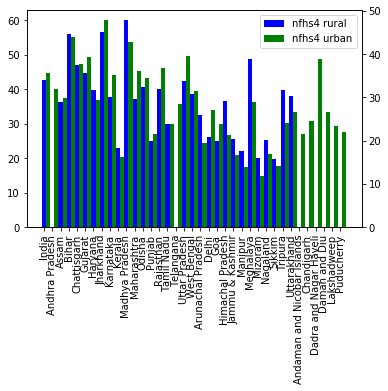

<Figure size 21600x21600 with 0 Axes>

In [30]:
#plot gender of  nfhs 4 rural vs urban for each state

x = np.arange(len(underweight_adequateweight_NFHS3_NFHS4['state']))
tick_locations = [value for value in x]
                  
        
ax1 = plt.subplot(1,1,1)
w = 0.5
#plt.xticks(), will label the bars on x axis with the respective state names.
plt.xticks(tick_locations, underweight_adequateweight_NFHS3_NFHS4['state'], rotation="vertical")
pop =ax1.bar(x,underweight_adequateweight_NFHS3_NFHS4['Children_Underweight_5years(Weight-For-Age)_x'], width=w, color='b', align='center')
#The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
ax2 = ax1.twinx()

gdp =ax2.bar(x + w, underweight_adequateweight_NFHS3_NFHS4['Children_Underweight_5years(Weight-For-Age)_y'], width=w,color='g',align='center')
#Set the Y axis label 


plt.ylabel('')
plt.xlabel('States of india')
#To set the legend on the plot we have used plt.legend()
plt.legend([pop, gdp],[ 'nfhs4 rural','nfhs4 urban'])
plt.figure(figsize=(300,300))
plt.show()




In [58]:
underweight_adequateweight_NFHS4r_NFHS4u = pd.merge(Survey_NFHS4_rural,Survey_NFHS4_urban, on="state")
underweight_adequateweight_NFHS4r_NFHS4u




summary_table2 = pd.DataFrame({"state":underweight_adequateweight_NFHS4r_NFHS4u['state'],
                               "underweight of rural ":underweight_adequateweight_NFHS4r_NFHS4u['Children_Underweight_5years(Weight-For-Age)_x'],
                               "underweight of urban":underweight_adequateweight_NFHS4r_NFHS4u['Children_Underweight_5years(Weight-For-Age)_y'],
                               
                               "aqeuate diet of rural":underweight_adequateweight_NFHS4r_NFHS4u['Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk_x'],
                               "adeuate diet of urban":underweight_adequateweight_NFHS4r_NFHS4u['Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk_y'],
                              })
  




summary_table2['change in adequate diet'] =  underweight_adequateweight_NFHS4r_NFHS4u['Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk_y'] - underweight_adequateweight_NFHS4r_NFHS4u['Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk_x']
summary_table2

,state,underweight of rural,underweight of urban,aqeuate diet of rural,adeuate diet of urban,change in adequate diet
0,India,38.3,29.1,39.9,50.1,10.2
1,Andhra Pradesh,33.1,28.4,50.6,72.8,22.2
2,Assam,30.8,21.4,50.5,44.0,-6.5
3,Bihar,44.6,37.5,29.5,41.2,11.7
4,Chattisgarh,39.6,30.2,54.4,50.3,-4.1
5,Gujarat,44.2,32.0,44.4,55.4,11.0
6,Haryana,29.9,28.5,34.5,38.8,4.3
7,Jharkhand,49.8,39.3,45.1,55.4,10.3
8,Karnataka,37.7,31.5,42.8,52.4,9.6
9,Kerala,16.7,15.5,62.4,64.2,1.8
